In [22]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [24]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [25]:
df.shape

(103, 7)

## Data Cleaning

In [26]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")  
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [27]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


### renaming columns

In [28]:
df.rename(columns={'Production (Tons)' : 'production(tons)'},inplace=True)
df.rename(columns={"Production per Person (Kg)":"productionperperson(kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"acreage(hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"yield(kg/hectare)"},inplace=True)



In [29]:
df.head()

,Unnamed: 0,Country,Continent,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


### checking the null values

In [30]:
df.isna().sum()

Unnamed: 0                 0
Country                    0
Continent                  0
production(tons)           0
productionperperson(kg)    0
acreage(hectare)           1
yield(kg/hectare)          1
dtype: int64

In [31]:
df[df["acreage(hectare)"].isna()]

,Unnamed: 0,Country,Continent,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [32]:
df=df.dropna().reset_index()

In [33]:
df.head()

,index,Unnamed: 0,Country,Continent,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


### removng the unnecessary columns

In [34]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [35]:
df.head()

,Country,Continent,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


### checking the datatypes

In [36]:
df.dtypes

Country                    object
Continent                  object
production(tons)           object
productionperperson(kg)    object
acreage(hectare)           object
yield(kg/hectare)          object
dtype: object

In [37]:
df["production(tons)"]=df["production(tons)"].astype(float)
df["productionperperson(kg)"]=df["productionperperson(kg)"].astype(float)
df["acreage(hectare)"]=df["acreage(hectare)"].astype(float)
df["yield(kg/hectare)"]=df['yield(kg/hectare)'].astype(float)

In [38]:
df.dtypes

Country                     object
Continent                   object
production(tons)           float64
productionperperson(kg)    float64
acreage(hectare)           float64
yield(kg/hectare)          float64
dtype: object

In [39]:
df.nunique()

Country                    102
Continent                    6
production(tons)           102
productionperperson(kg)    101
acreage(hectare)           101
yield(kg/hectare)          102
dtype: int64

## analysis


In [40]:
df.head()

,Country,Continent,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## how may countries produce sugarcane from each continent

In [41]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

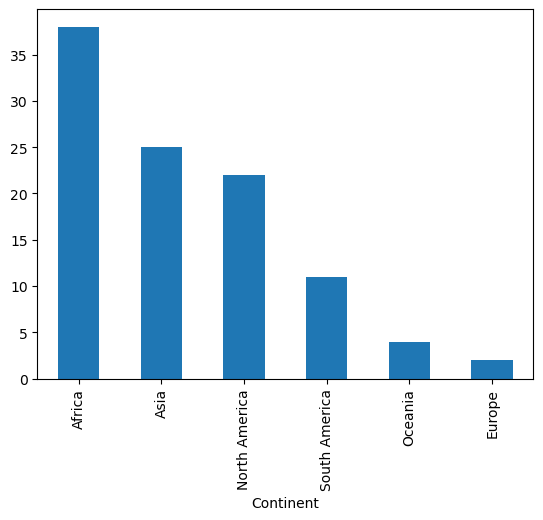

In [42]:
df["Continent"].value_counts().plot(kind="bar")

### distrubutiion of  columns

C:\Users\mundl\AppData\Local\Temp\ipykernel_11472\232715727.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["production(tons)"])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mundl\AppData\Local\Temp\ipykernel_11472\232715727.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

<Axes: xlabel='yield(kg/hectare)', ylabel='Density'>

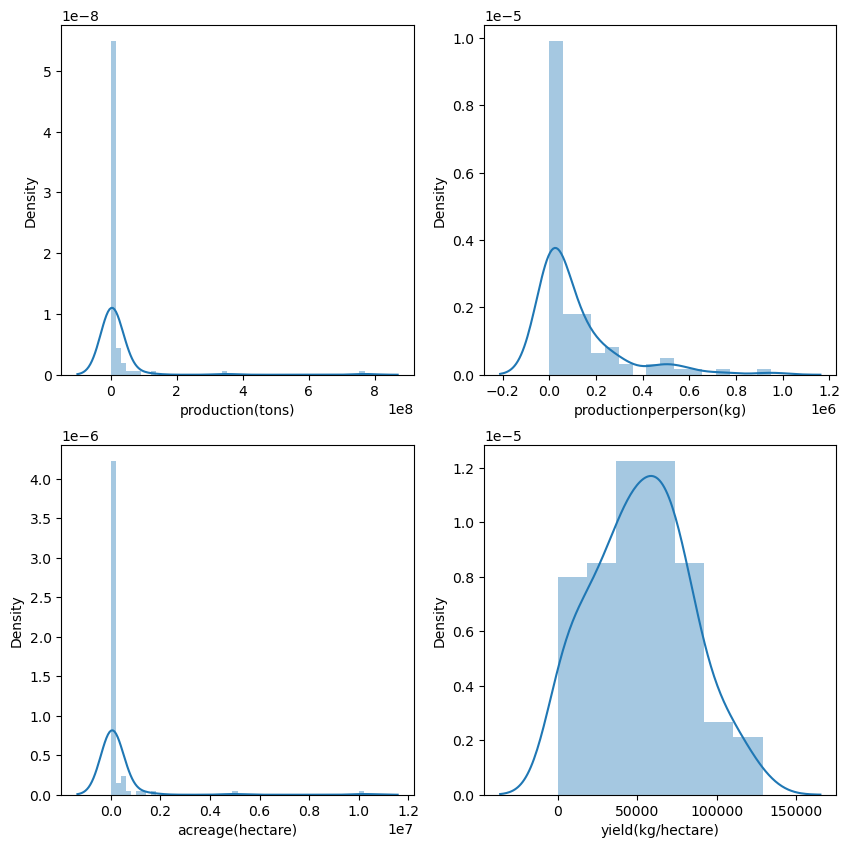

In [43]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.distplot(df["production(tons)"])

plt.subplot(2,2,2)
sns.distplot(df['productionperperson(kg)'])

plt.subplot(2,2,3)
sns.distplot(df['acreage(hectare)'])

plt.subplot(2,2,4)
sns.distplot(df["yield(kg/hectare)"])

## checking outliers

<Axes: >

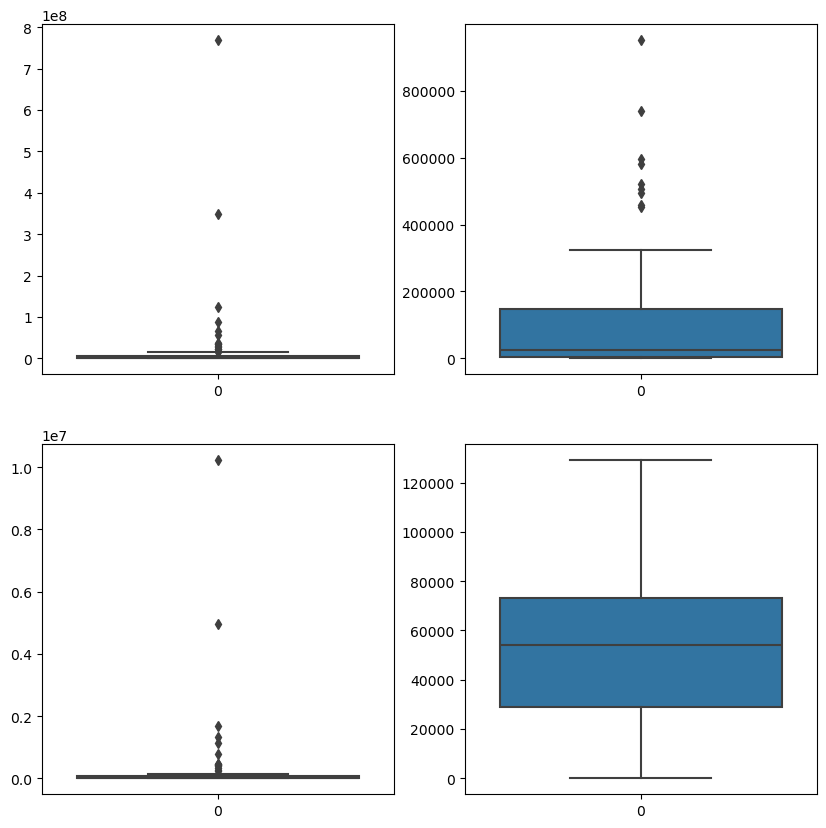

In [44]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(df["production(tons)"])

plt.subplot(2,2,2)
sns.boxplot(df['productionperperson(kg)'])

plt.subplot(2,2,3)
sns.boxplot(df["acreage(hectare)"])

plt.subplot(2,2,4)
sns.boxplot(df["yield(kg/hectare)"])

In [45]:
df.describe()

,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## which country produces maximum sugarcane?

In [46]:
df.head()

,Country,Continent,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [47]:
df["production(tons)"].max()

768678382.0

In [48]:
df_new=df[["Country","production(tons)"]].set_index("Country")

In [49]:
df_new.head()

,production(tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [50]:
df_new["production(tons)percent"]=df_new["production(tons)"]*100/df_new["production(tons)"].sum()

In [51]:
df_new

,production(tons),production(tons)percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='production(tons)percent'>

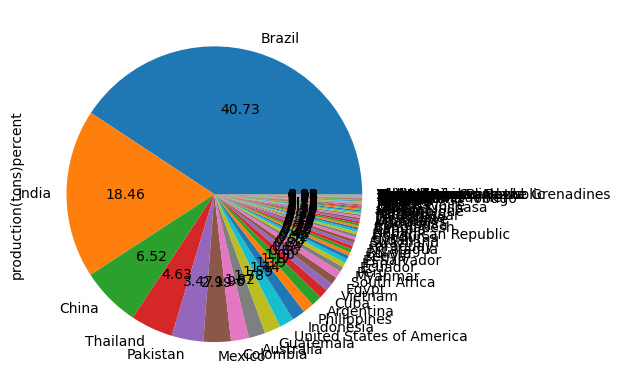

In [54]:
df_new["production(tons)percent"].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

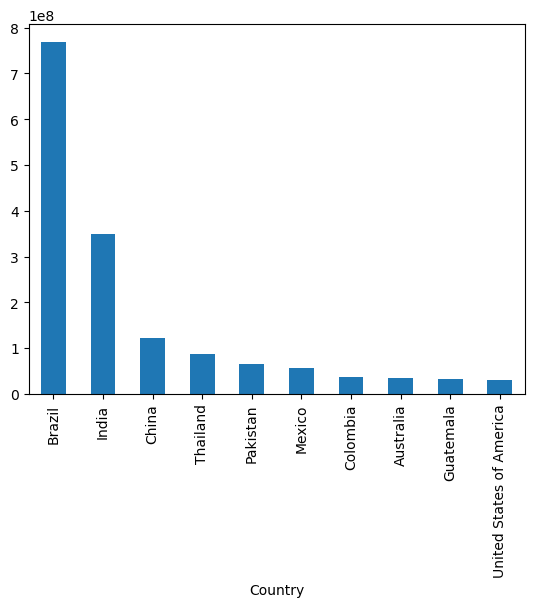

In [55]:
df_new["production(tons)"].head(10).plot(kind="bar")

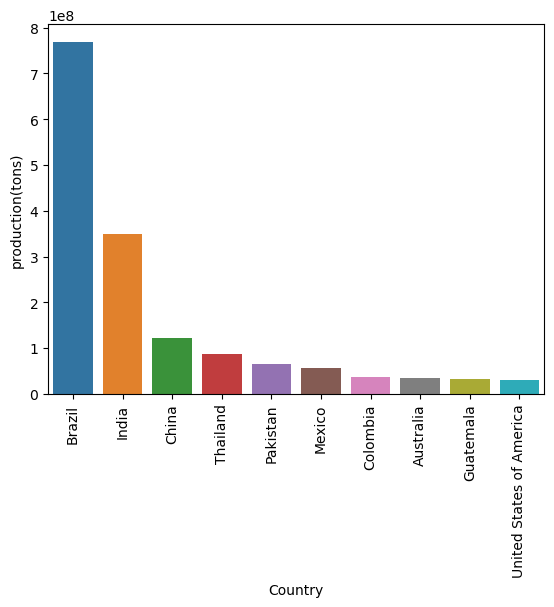

In [56]:
ax=sns.barplot(data=df.head(10),x="Country",y="production(tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## which country has highest land


In [ ]:
df.head()

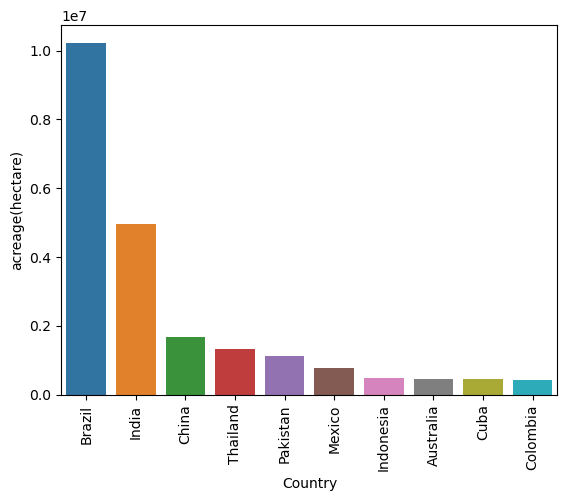

In [57]:
df_acre=df.sort_values("acreage(hectare)",ascending=False)
ax=sns.barplot(data=df_acre.head(10),x="Country",y="acreage(hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## which country has hieghest yield per hectare

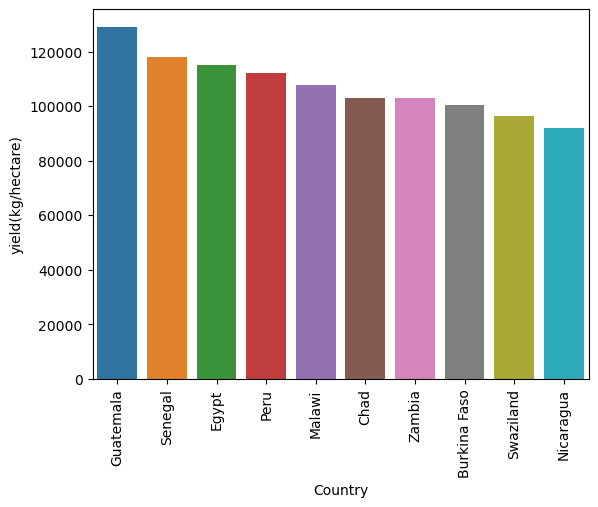

In [58]:
df_yield=df.sort_values("yield(kg/hectare)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country",y="yield(kg/hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [59]:
df.head()

,Country,Continent,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## which country has highest production per person

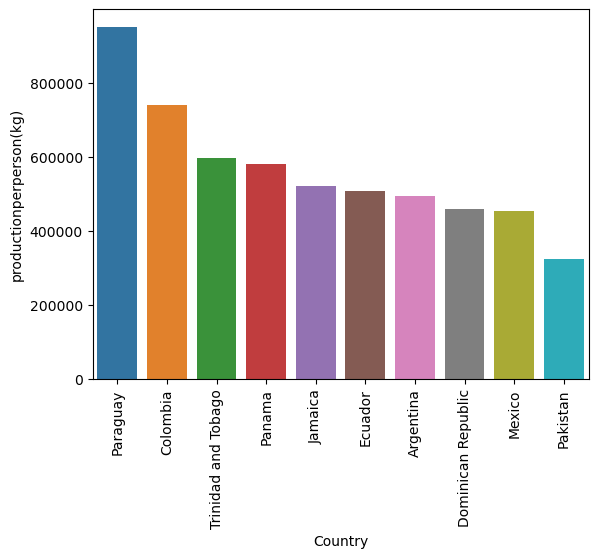

In [60]:
df_ppkg=df.sort_values("productionperperson(kg)",ascending=False)
ax=sns.barplot(data=df_ppkg.head(10),x="Country",y="productionperperson(kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## correlation

In [62]:
df.corr()

ValueError: could not convert string to float: 'Brazil'

## do countries with highest land produce moree sugarcane?

<Axes: xlabel='acreage(hectare)', ylabel='production(tons)'>

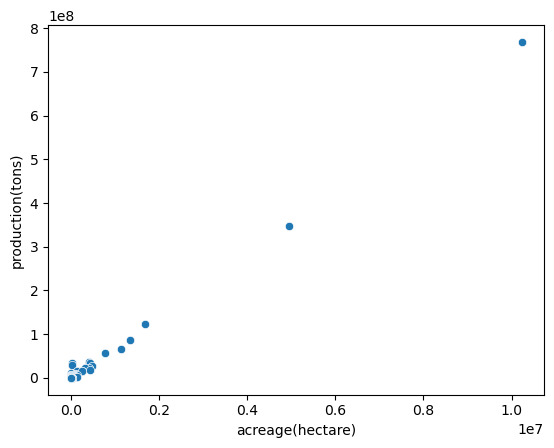

In [63]:
sns.scatterplot(data=df,x="acreage(hectare)",y="production(tons)")

## do countries which yield more sugarcane per hectare produces more sugarcane

In [64]:
df.head()

,Country,Continent,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<Axes: xlabel='yield(kg/hectare)', ylabel='production(tons)'>

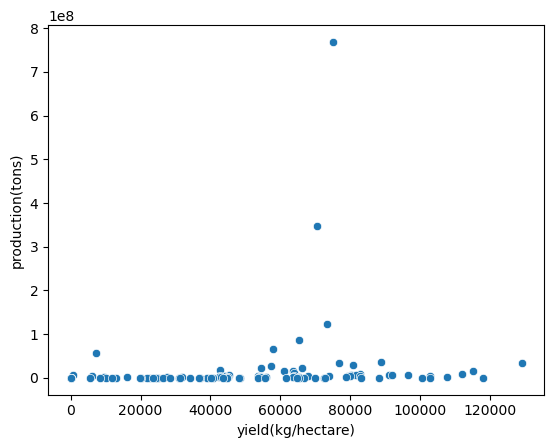

In [65]:
sns.scatterplot(data=df,x="yield(kg/hectare)",y="production(tons)")

## Analysis for continenet

In [66]:
df_continent=df.groupby("Continent").sum()

In [67]:
df_continent

,Country,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


## which continetn produces max production


<Axes: xlabel='Continent'>

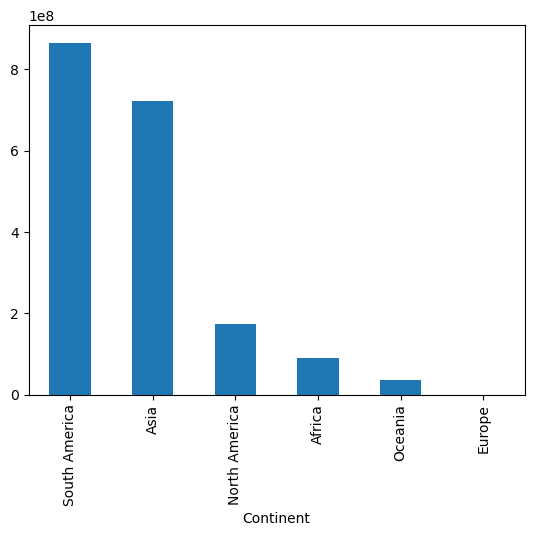

In [68]:
df_continent["production(tons)"].sort_values(ascending=False).plot(kind="bar")

In [69]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

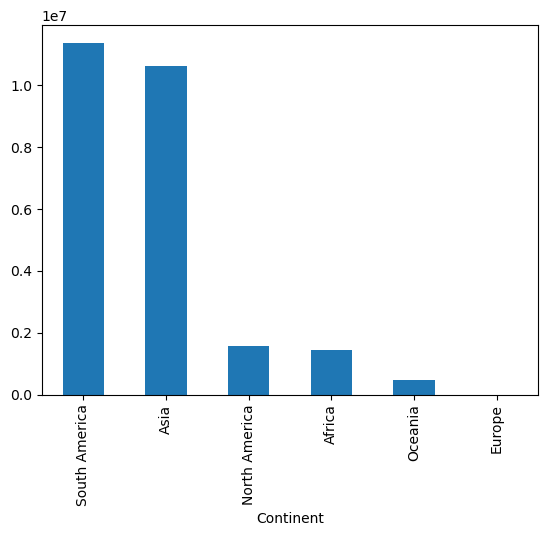

In [70]:
df_continent["acreage(hectare)"].sort_values(ascending=False).plot(kind="bar")

### do no.of countries in a continent effects production of sugarcane

In [71]:
df_continent["no of countries"]=df.groupby("Continent").count()["Country"]

In [72]:
df_continent

,Country,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare),no of countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


In [ ]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x="no of countries",y="production(tons)")
plt.xticks(df_continent["no of countries"],continent_names,rotation=75)
plt.show()

## do continents with highest land produces more production

In [73]:
df_continent

,Country,production(tons),productionperperson(kg),acreage(hectare),yield(kg/hectare),no of countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='production(tons)', ylabel='acreage(hectare)'>

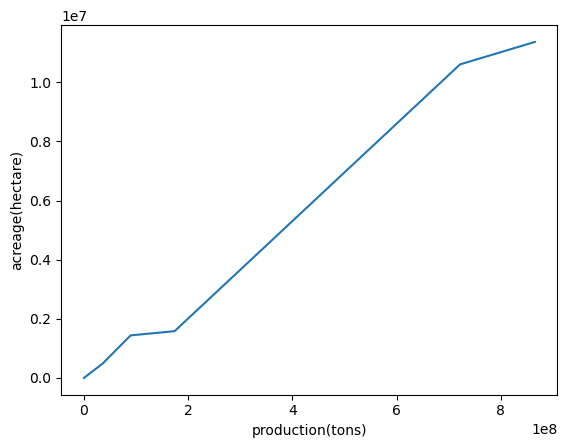

In [74]:
sns.lineplot(data=df_continent,x="production(tons)",y="acreage(hectare)")

## production distrubution by continent

<Axes: ylabel='production(tons)'>

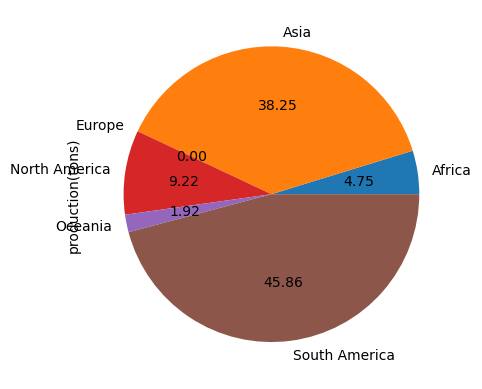

In [80]:
df_continent["production(tons)"].plot(kind="pie",autopct="%.2f")

KeyError: "'Misc' is not a known colormap name"

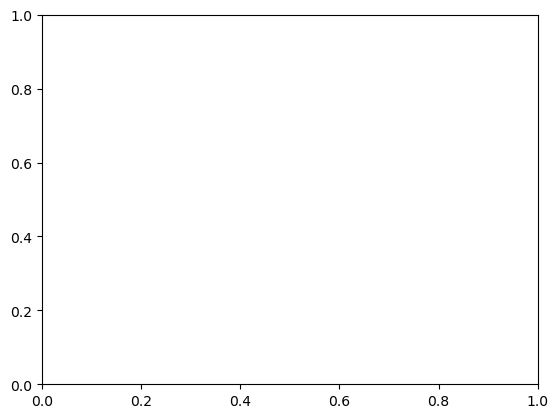

In [85]:
df_continent["no of countries"].plot(kind="pie",autopct="%.2f",colormap="Misc")